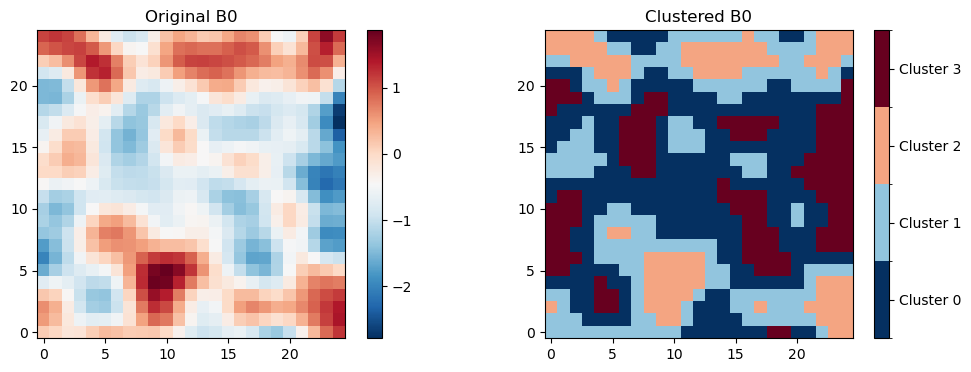

[1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 3 3 0 0 1 2 2 1 1 1 0 0 0 0 1 1 2 2 1
 0 0 0 0 1 1 1 1 1 1 2 2 2 2 1 0 0 3 3 0 1 2 2 2 1 0 0 0 1 1 2 1 1 1 2 2 2
 2 1 1 0 0 3 3 0 1 2 2 2 2 1 0 0 1 1 1 1 1 1 1 2 2 2 0 0 0 0 3 0 0 1 2 2 2
 2 2 1 1 0 0 0 0 0 0 1 2 2 2 3 3 0 0 0 0 1 1 2 2 2 2 2 1 1 0 0 3 3 3 0 1 1
 1 1 3 3 3 0 1 1 1 1 2 2 2 2 2 1 0 0 3 3 3 3 0 0 0 0 0 3 3 0 0 1 1 1 1 1 1
 1 1 1 1 0 0 3 3 3 0 0 0 3 3 3 3 3 0 0 1 2 2 1 1 0 0 0 0 0 0 0 3 3 3 0 0 0
 3 3 3 3 3 3 0 1 1 1 1 1 0 0 0 0 0 0 0 3 3 0 0 1 0 0 3 3 3 3 3 0 0 1 1 0 0
 0 0 0 0 0 0 3 3 3 0 0 1 0 0 3 3 0 3 3 0 0 0 0 0 0 0 0 0 0 0 3 3 3 3 0 0 0
 0 3 3 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 3 3 3 3 1 1 1 1 0 0 0 3
 3 0 0 0 0 0 0 0 1 1 0 0 3 3 3 3 3 1 1 1 1 1 0 3 3 3 0 0 0 0 0 0 1 1 1 0 0
 0 3 3 3 3 0 1 1 1 0 0 3 3 3 0 1 1 1 0 0 0 0 0 0 0 0 0 3 3 3 0 0 1 1 0 0 3
 3 3 0 1 1 1 0 0 3 3 3 0 0 0 0 3 3 3 0 0 0 1 0 0 3 3 3 0 1 1 0 0 3 3 3 3 3
 0 0 0 3 3 3 3 0 0 0 0 0 0 3 3 3 0 0 0 0 0 0 0 0 0 0 0 0 3 3 3 3 3 3 0 1 1
 1 0 3 3 0 0 0 0 1 1 0 0 

In [2]:
import numpy as np
import gstools as gs
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import pandas as pd

# 生成数据
x = np.linspace(0, 25, 25)
y = np.linspace(0, 25, 25)
XX, YY = np.meshgrid(x, y)

# 第一个数据
model = gs.Gaussian(dim=2, var=1, len_scale=3)
srf = gs.SRF(model, mean=0.)
srf((x, y), mesh_type='structured')
B0 = srf((x, y), mesh_type='structured', seed=100)

# 将B0转换为适合聚类的格式
data = B0.reshape(-1, 1)

def process_data_with_randomness_SINGLE(data):
# 进行K-means聚类分析
    kmeans = KMeans(n_clusters=4).fit(data)
    labels = kmeans.labels_

    clustered_B0 = labels.reshape(B0.shape)

    fig, axs = plt.subplots(1, 2, figsize=(12, 4))

    im0 = axs[0].imshow(B0, origin='lower', cmap='RdBu_r')
    axs[0].set_title('Original B0')
    fig.colorbar(im0, ax=axs[0])

    cmap = mcolors.ListedColormap(['#053061', '#2166AC', '#4393C3', '#92C5DE', '#D1E5F0', '#FDDBC7', '#F4A582', '#D6604D', '#B2182B', '#67001F'])
    bounds = [0, 1, 2, 3, 4]
    norm = mcolors.BoundaryNorm(bounds, cmap.N)

    im1 = axs[1].imshow(clustered_B0, cmap=cmap, norm=norm, origin='lower')
    axs[1].set_title('Clustered B0')

    cbar = fig.colorbar(im1, ax=axs[1], ticks=[0.5, 1.5, 2.5, 3.5])
    cbar.ax.set_yticklabels(['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3'])

    plt.show()
    print(labels)
    return labels

def process_data_with_randomness(data):
# 进行K-means聚类分析
    kmeans = KMeans(n_clusters=4).fit(data)
    labels = kmeans.labels_
    return labels


def calcuCirculation_for_point(data,time):
    all_processed_values = []
    results_df = pd.DataFrame()
    if time == 2:
        for i in range(1, time):
            processed_value = process_data_with_randomness_SINGLE(data)
            all_processed_values.append(pd.Series(processed_values, name=f'Out0'))
        results_df = pd.concat(all_processed_values, axis=1)
        results_df.to_csv("initial-out/pred_nonoisy_initial.csv", index=False)
    if time != 2:
        for i in range(1, time):
            print(i)
            processed_value = process_data_with_randomness(data)
            all_processed_values.append(pd.Series(processed_values, name=f'Out{i}'))
        results_df = pd.concat(all_processed_values, axis=1)
        results_df.to_csv("repro-out/pred_nonoisy.csv", index=False)
        # 检查结果
        print(results_df)

times = 1001
calcuCirculation_for_point(data, 2)
calcuCirculation_for_point(data, times)


In [4]:
def process_data_with_randomness(data):
# 进行K-means聚类分析
    kmeans = KMeans(n_clusters=4).fit(data)
    labels = kmeans.labels_

    # 将标签重新转换为B0的形状
    clustered_B0 = labels.reshape(B0.shape)

    
    # print(labels)
    return labels

# 收集所有的 processed_values
all_processed_values = []

# 运行过程 1000 次并存储结果
for i in range(1, 1001):
    print(i)
    processed_values = process_data_with_randomness(data)
    all_processed_values.append(pd.Series(processed_values, name=f'Out{i}'))

# Initialize the dataframe to store results
results_df = pd.DataFrame()
# 将所有列一次性连接到 results_df 中
results_df = pd.concat(all_processed_values, axis=1)
results_df["value"] =B0.ravel()
results_df.to_csv("repro-out/pred_nonoisy_1000.csv", index=False)
# 检查结果
print(results_df)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277
